# **Assignment 2**

Possible points: 100

Rename the .ipynb notebook as `Assignment_2_{FirstName}_{LastName}.ipynb` before submitting your notebook. Eg. Assignment_2_Zhengjun_An.ipynb

Submit the .ipynb notebook only. There is no need to submit the data file and any other write up. All your code, and answers should be included in the notebook.

Use the dataset `mall-customers.csv` to answer the questions in Part A.

Use the dataset `housing-price.csv` to answer the questions in Part B.

*Please provide the following information:*

* Name:

* Comet ID:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
print("Current time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Current time: 2026-02-18 14:25:51


# **Part B: House Value Prediction**

Use the dataset `housing-price.csv` to answer the questions in Part B.

**Context:** Imagine you are working as a data scientist for a real estate company. Your goal is to analyze the housing market data and build a predictive model to estimate house values based on various features.

The data includes:
- **TOTAL VALUE**: Total market value of the house.
- **LOT SQFT**: Lot size in square feet.
- **YR BUILT**: Year the house was built.
- **GROSS AREA**: Total gross area of the house.
- **LIVING AREA**: Total living area of the house.
- **FLOORS**: Number of floors in the house.
- **ROOMS**: Number of rooms in the house.
- **BEDROOMS**: Number of bedrooms in the house.
- **FULL BATH**: Number of full bathrooms.
- **HALF BATH**: Number of half bathrooms.
- **KITCHEN**: Number of kitchens.
- **FIREPLACE**: Number of fireplaces.
- **REMODEL**: Remodeling status of the house (e.g., None, Recent, Old).

## 6) Import the data.

### 6.1) [1 points] Load the dataset.

* *Hint: Please make sure you do not treat **`None`** as a missing value when importing the dataset.*

In [2]:
# Load part B dataset
house_data = pd.read_csv(
    'house-price.csv',
    na_values=["", "NA", "N/A", "na", "null", "NULL"],
    keep_default_na=False
)
house_data.head()

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880.0,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945.0,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890.0,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957.0,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910.0,2370,1438,2.0,7,3,2,0,1,0,None


### 6.2) [2 points] Basic overview of the dataset.

* *Note: The basic overview includes checking the dataset's: `shape`, `data types`, and `descriptive statistics` to understand its structure and key characteristics.*

In [3]:
house_data.shape

(5802, 13)

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOTAL VALUE  5802 non-null   float64
 1   LOT SQFT     5684 non-null   float64
 2   YR BUILT     5739 non-null   float64
 3   GROSS AREA   5802 non-null   int64  
 4   LIVING AREA  5802 non-null   int64  
 5   FLOORS       5802 non-null   float64
 6   ROOMS        5802 non-null   int64  
 7   BEDROOMS     5802 non-null   int64  
 8   FULL BATH    5802 non-null   int64  
 9   HALF BATH    5802 non-null   int64  
 10  KITCHEN      5802 non-null   int64  
 11  FIREPLACE    5802 non-null   int64  
 12  REMODEL      5768 non-null   object 
dtypes: float64(4), int64(8), object(1)
memory usage: 589.4+ KB


In [5]:
house_data.describe()

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
count,5802.000000,5684.000000,5739.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,6278.648311,1936.731835,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,2673.347478,36.115607,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4775.750000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,7016.250000,1954.500000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


### 6.3) [1 points] Identify numerical and categorical columns for future use.

In [6]:
house_num_col = house_data.select_dtypes(include=np.number).columns.to_list()
print("Numerical Columns:")
print(house_num_col)

house_cat_col = house_data.select_dtypes(include='object').columns.to_list()
print("\nCategorical Columns:")
print(house_cat_col)

Numerical Columns:
['TOTAL VALUE', 'LOT SQFT', 'YR BUILT', 'GROSS AREA', 'LIVING AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL BATH', 'HALF BATH', 'KITCHEN', 'FIREPLACE']

Categorical Columns:
['REMODEL']


## 7) Clean the data.

### 7.1) [2 points] Remove the duplicate rows (if exist).

* *Note: After removing duplicateste, make sure to output the dataset's shape again.*

In [7]:
# Show all duplicate records (including the first occurrence)
house_duplicate_records = house_data[house_data.duplicated(keep=False)]
print(f"Number of duplicate records (including all occurrences): {house_duplicate_records.shape[0]}")
house_duplicate_records

Number of duplicate records (including all occurrences): 6


,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
1139,564.8,6000.0,2005.0,4398,2543,2.0,8,4,2,2,1,1,None
1178,564.8,6000.0,2005.0,4398,2543,2.0,8,4,2,2,1,1,None
3886,582.8,6009.0,2004.0,3826,2341,2.0,7,4,2,1,1,1,None
3894,582.8,6009.0,2004.0,3826,2341,2.0,7,4,2,1,1,1,None
5224,620.4,5000.0,2004.0,4149,2516,2.0,7,4,3,1,1,2,None
5227,620.4,5000.0,2004.0,4149,2516,2.0,7,4,3,1,1,2,None


In [8]:
# Remove duplicates
house_data = house_data.drop_duplicates()
print(f"Shape of the dataset after removing duplicates: {house_data.shape}")

Shape of the dataset after removing duplicates: (5799, 13)


### 7.2) [2 points] Handle missing values (if exist).

In [9]:
# Check for missing values
house_data.isnull().sum()

TOTAL VALUE      0
LOT SQFT       118
YR BUILT        63
GROSS AREA       0
LIVING AREA      0
FLOORS           0
ROOMS            0
BEDROOMS         0
FULL BATH        0
HALF BATH        0
KITCHEN          0
FIREPLACE        0
REMODEL         34
dtype: int64

In [10]:
# Replace missing values with median for numerical columns
medianFiller = lambda x: x.fillna(x.median())
house_data[house_num_col] = house_data[house_num_col].apply(medianFiller, axis=0)

# Replace missing values with mode for categorical columns
modeFiller = lambda x: x.fillna(x.mode().values[0])
house_data[house_cat_col] = house_data[house_cat_col].apply(modeFiller, axis=0)

In [11]:
# Check for missing values again
house_data.isnull().sum()

TOTAL VALUE    0
LOT SQFT       0
YR BUILT       0
GROSS AREA     0
LIVING AREA    0
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL BATH      0
HALF BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

### 7.3) [2 points] Check the 'YR BUILT' column and see if there is any abnormal value(s).

* *Note: After handling outliers, make sure to output the dataset's shape again.*

In [12]:
house_data['YR BUILT'].describe()

count    5799.000000
mean     1936.678048
std        35.895742
min         0.000000
25%      1920.000000
50%      1935.000000
75%      1954.000000
max      2011.000000
Name: YR BUILT, dtype: float64

In [13]:
# Remove outliers in 'YR BUILT' column
# Just delete this row whose 'YR BUILT' is 0
house_data = house_data[house_data['YR BUILT'] != 0]
print(f"Shape of the dataset after removing outliers: {house_data.shape}")

Shape of the dataset after removing outliers: (5798, 13)


## 8) Perform deeper exploratory data analysis (EDA).

### 8.1) [5 points] Univariate Analysis.

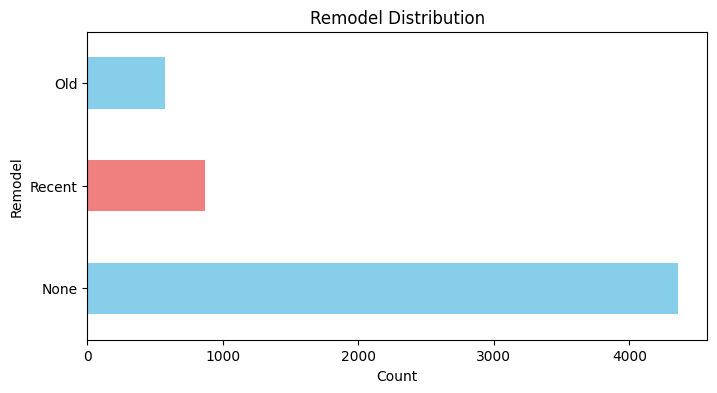

In [14]:
# Check the distribution of Categorical variables
remodel_counts = house_data['REMODEL'].value_counts()
plt.figure(figsize=(8, 4))
remodel_counts.plot(kind='barh', color=['skyblue', 'lightcoral'])
plt.title('Remodel Distribution')
plt.xlabel('Count')
plt.ylabel('Remodel')
plt.show()

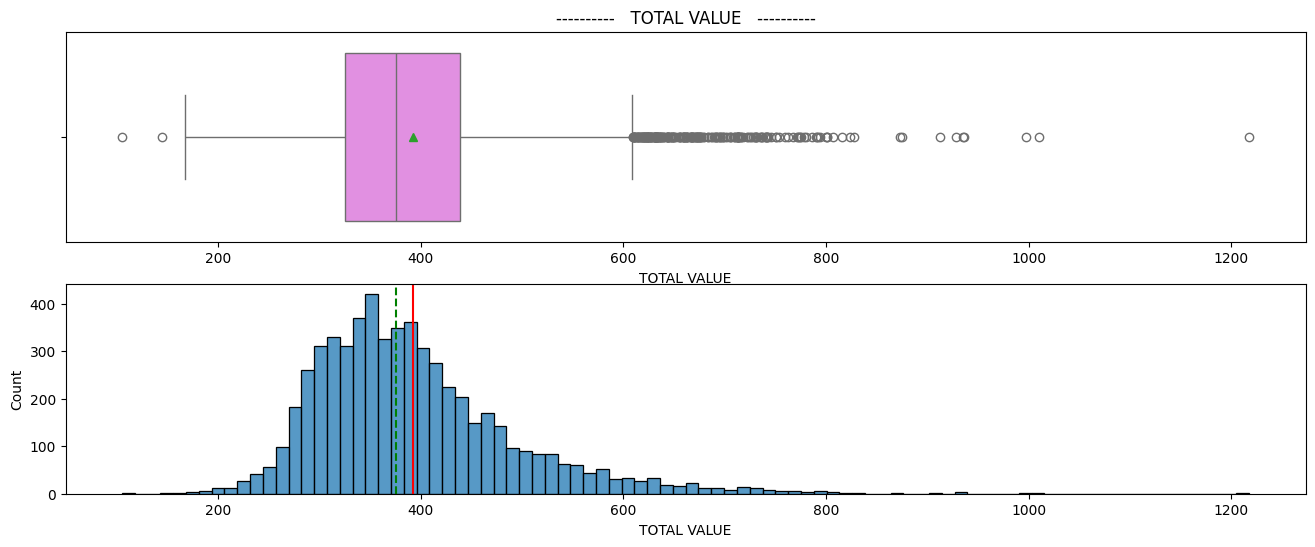

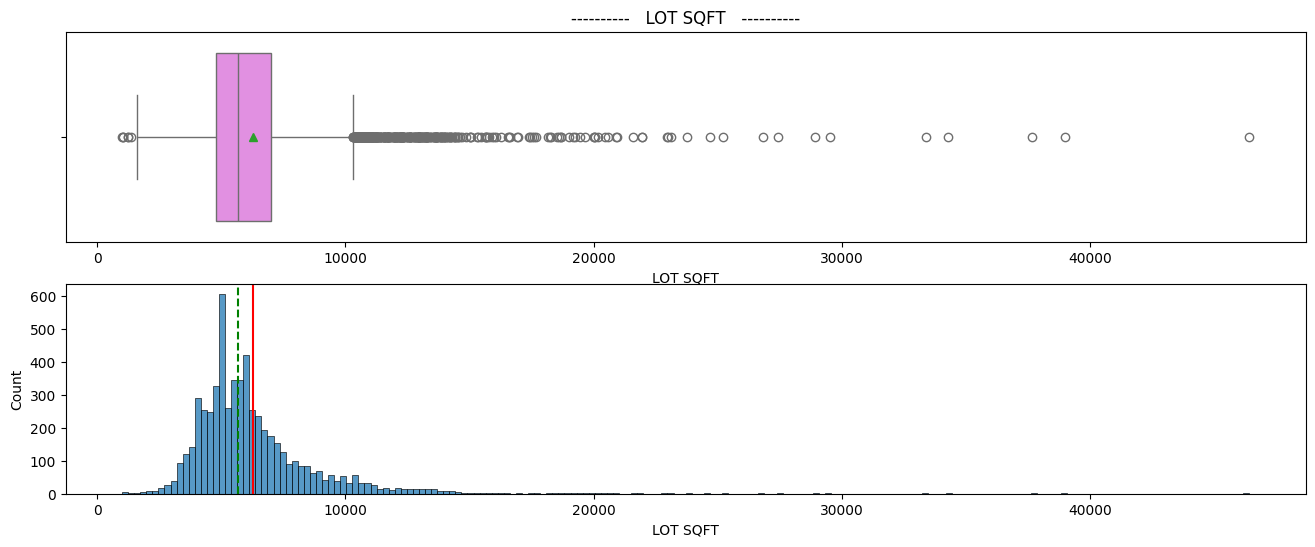

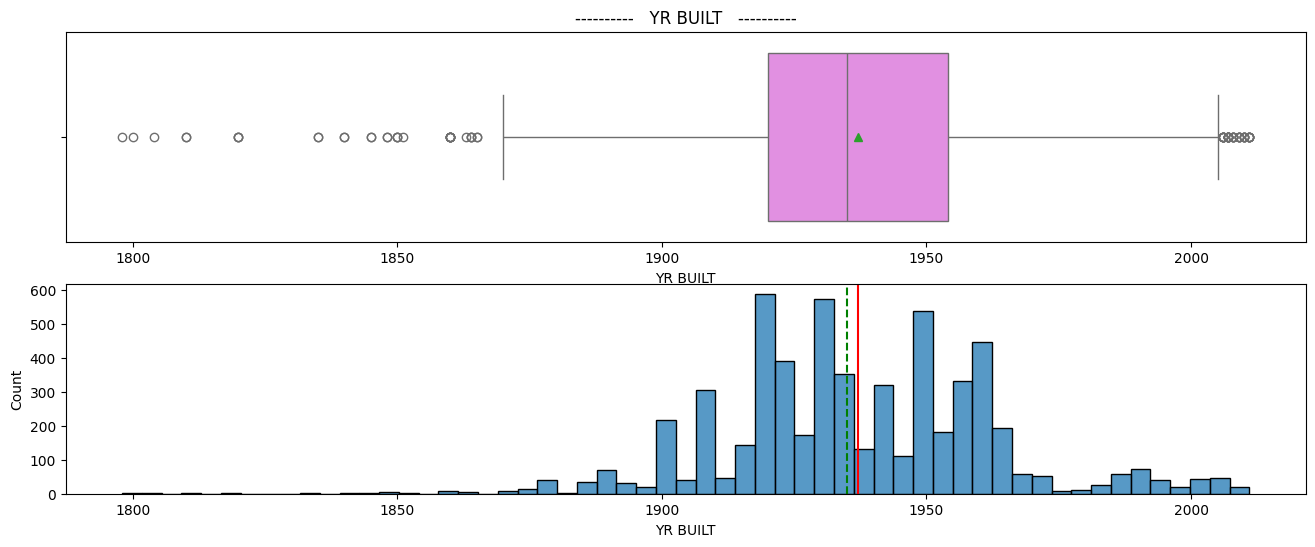

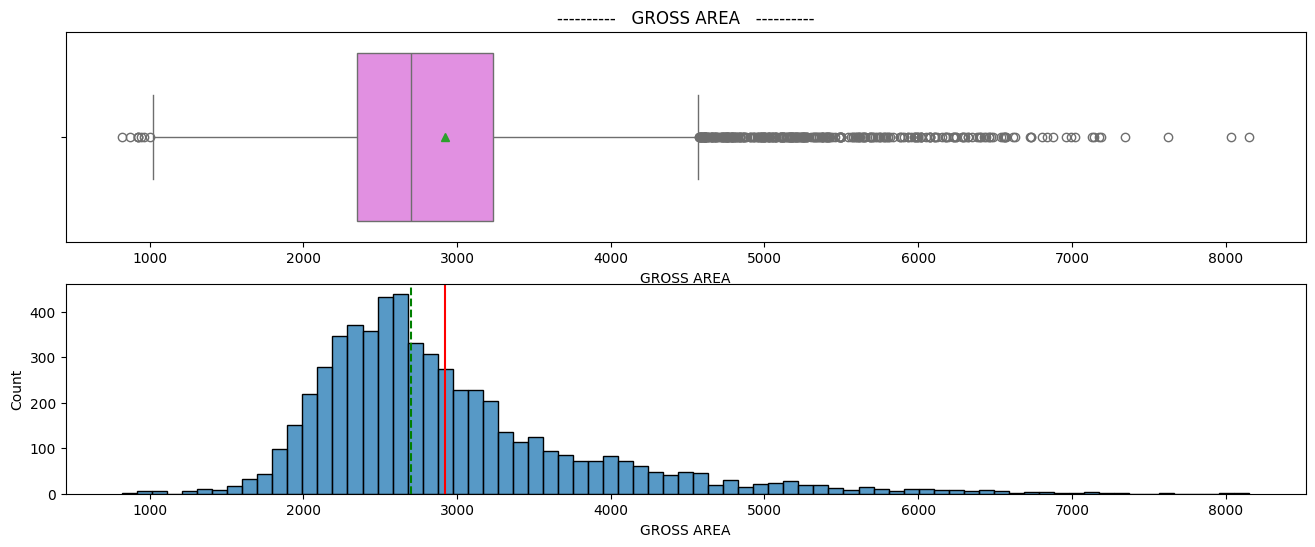

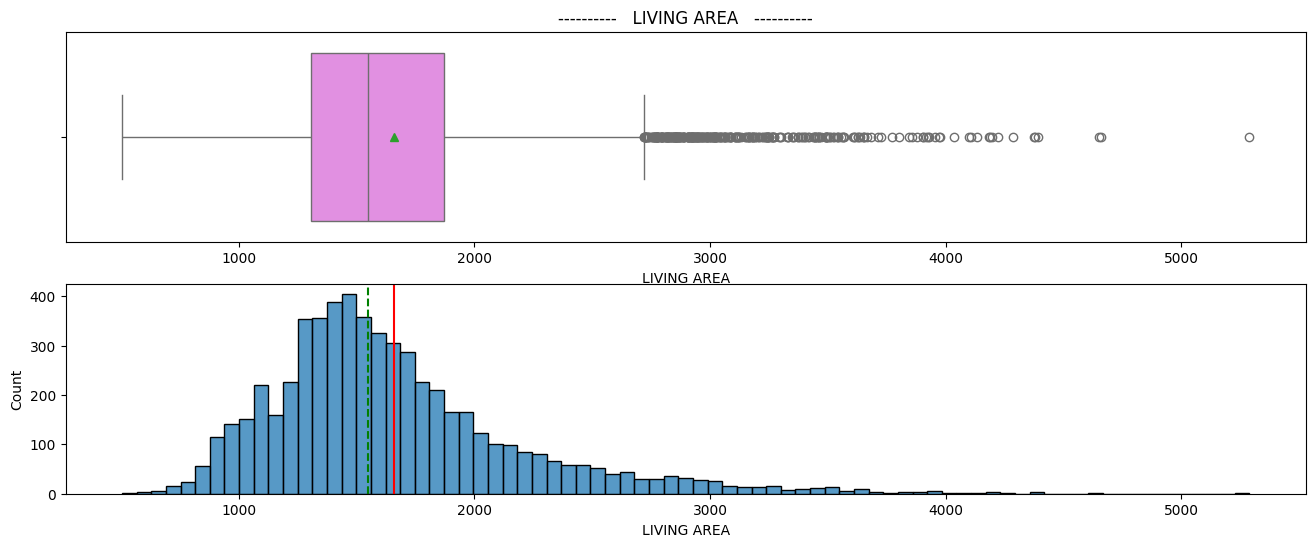

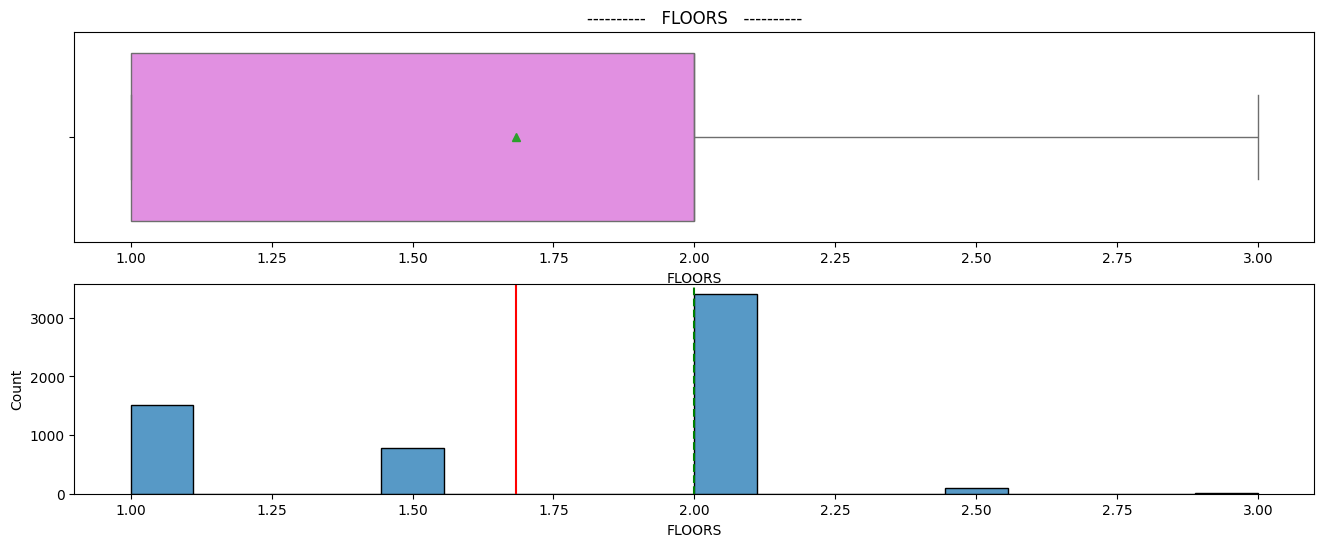

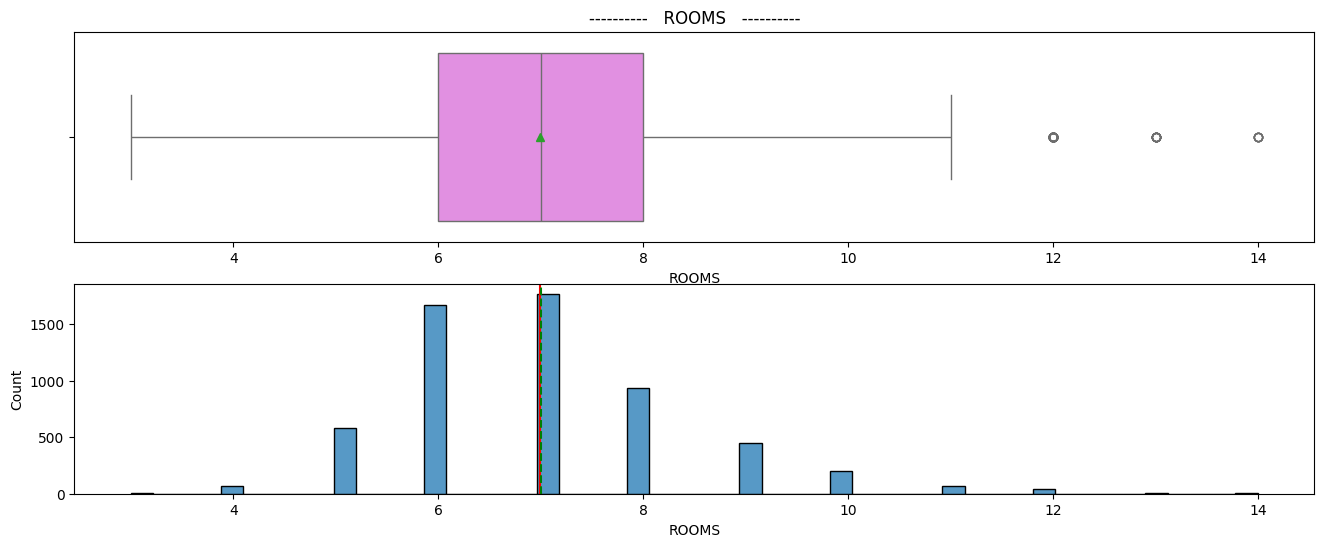

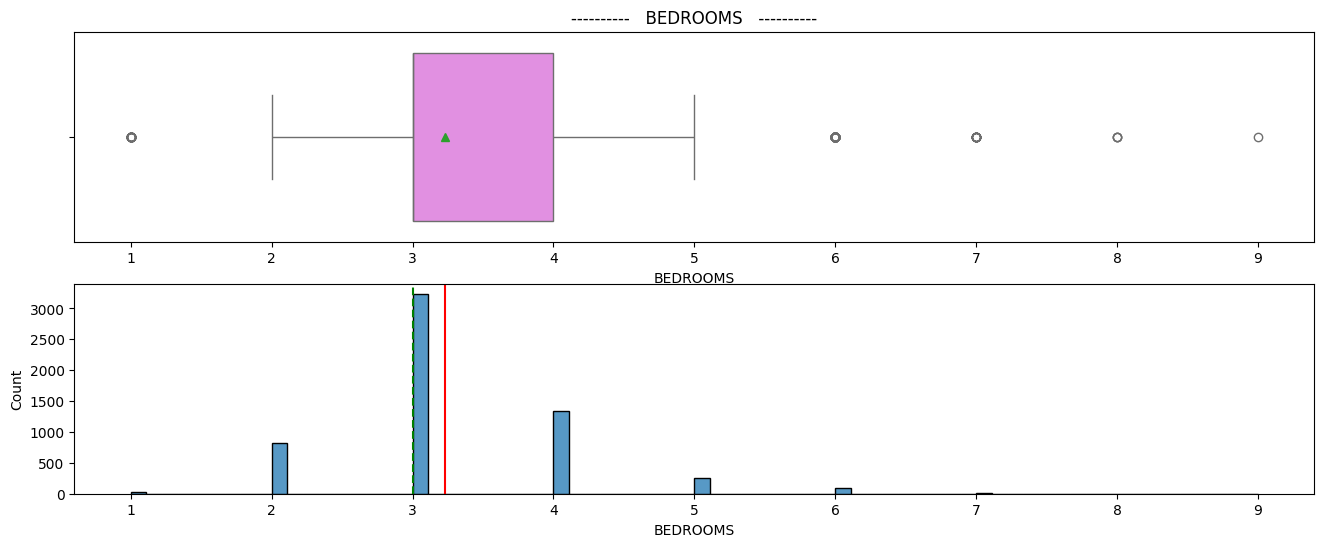

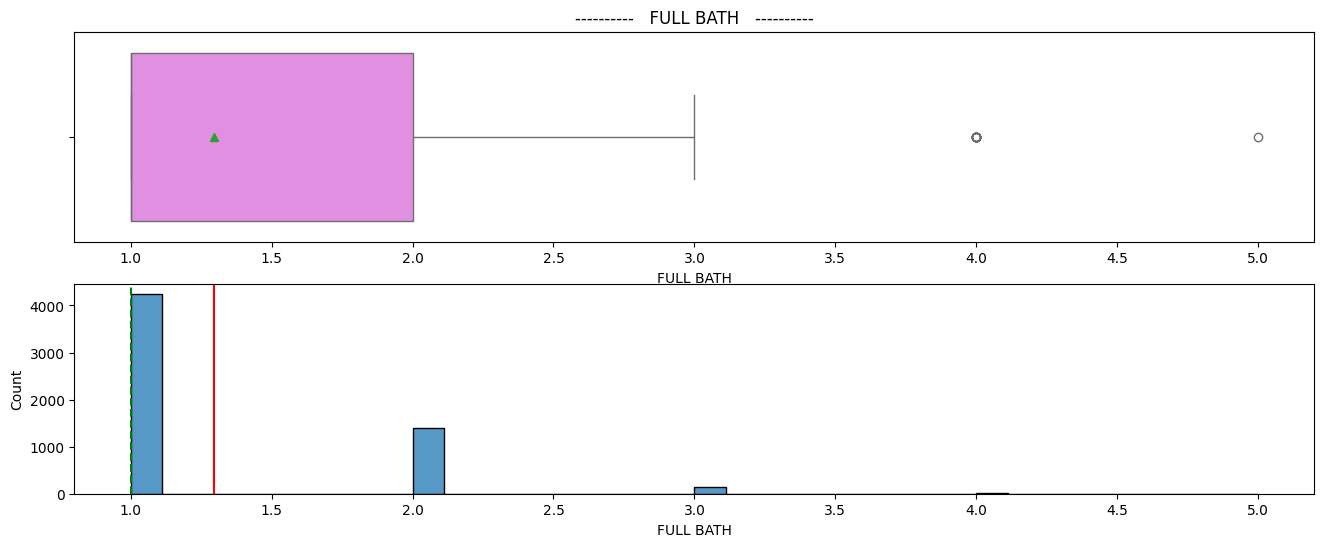

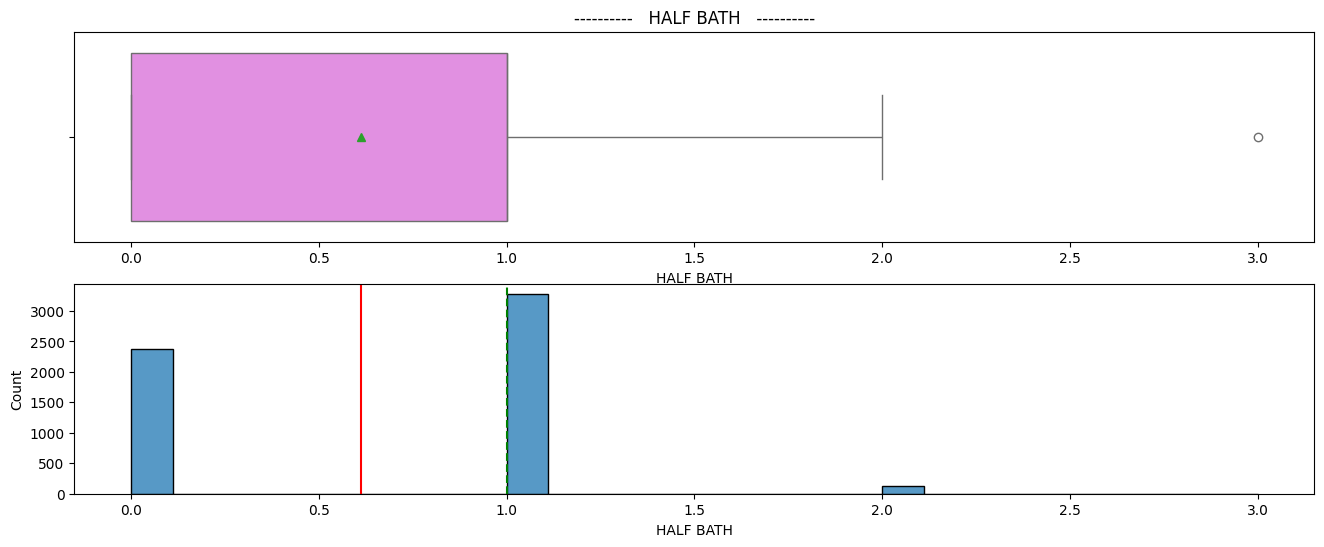

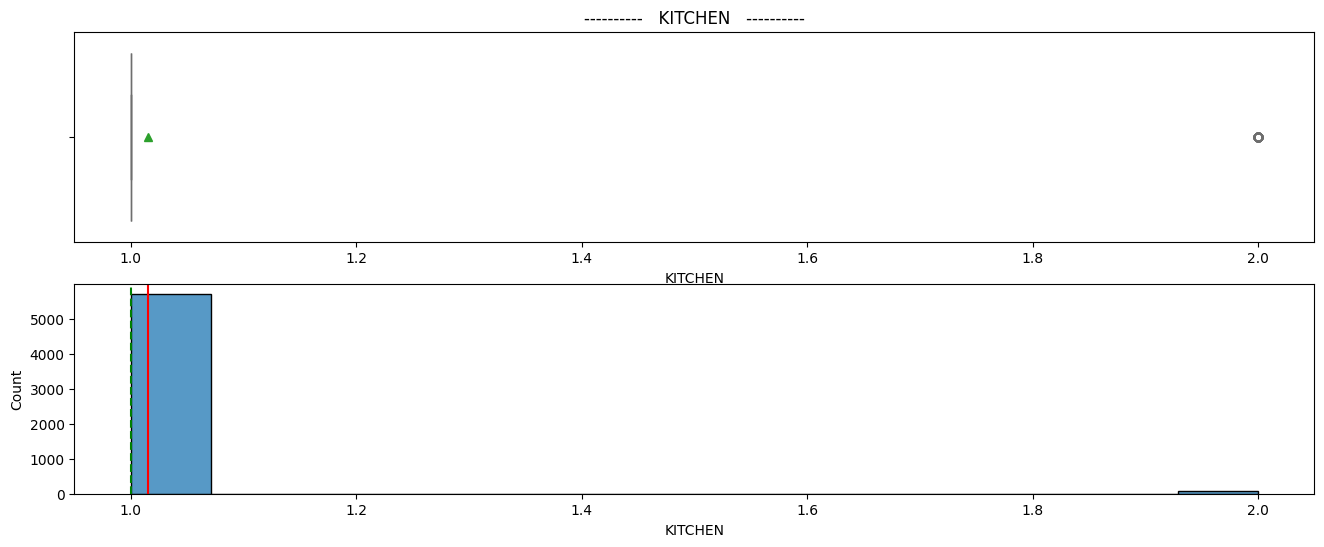

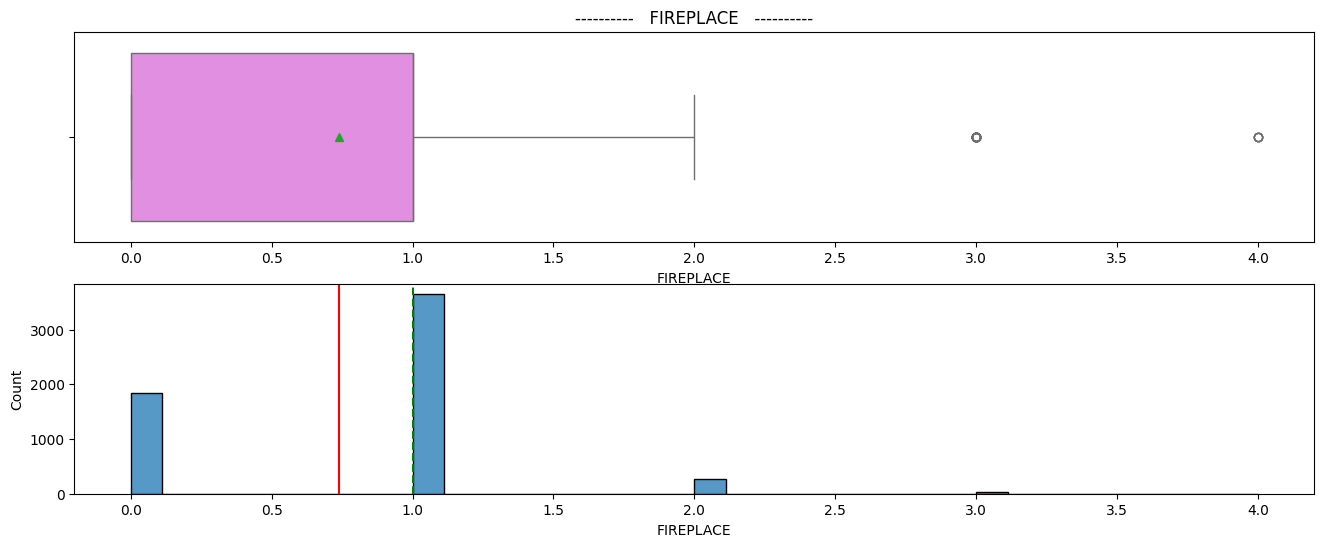

In [15]:
# Univariate Analysis: Boxplots and Histograms
for col in house_num_col:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=house_data, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=house_data, x=col)
    plt.axvline(house_data[col].mean(), color="red", linestyle="-")
    plt.axvline(house_data[col].median(), color="green", linestyle="--")
    plt.show()

### 8.2) [5 points] Bivariate Analysis.

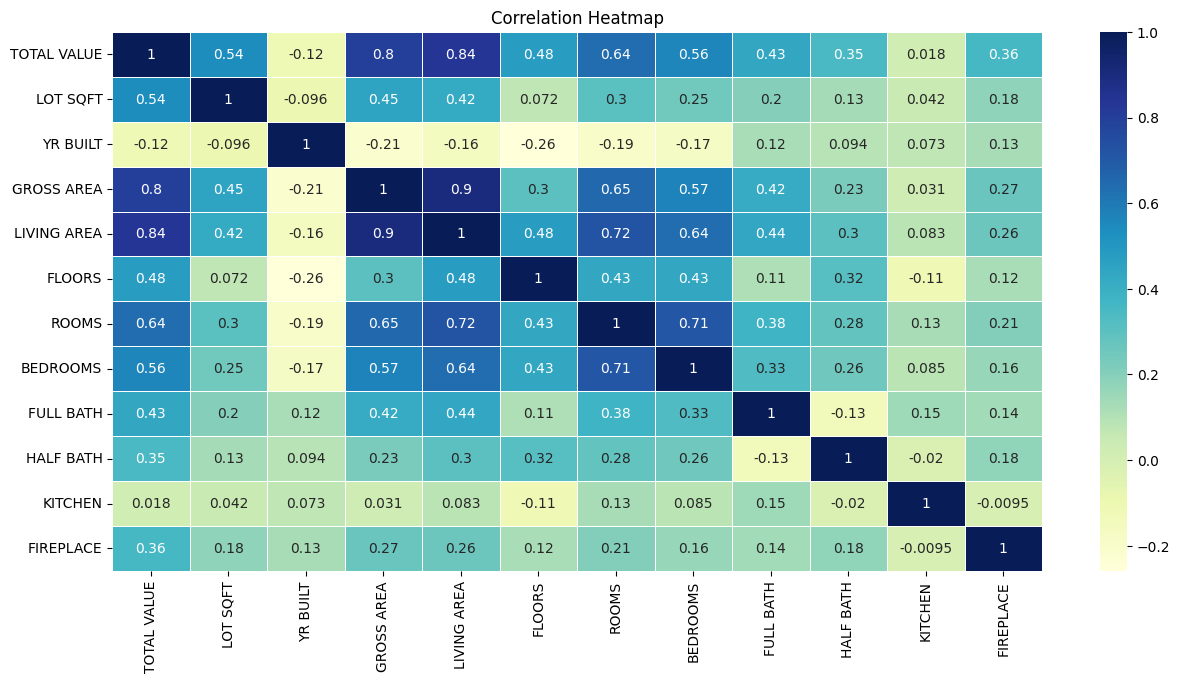

In [16]:
# Bivariate Analysis: Correlation Heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(house_data[house_num_col].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

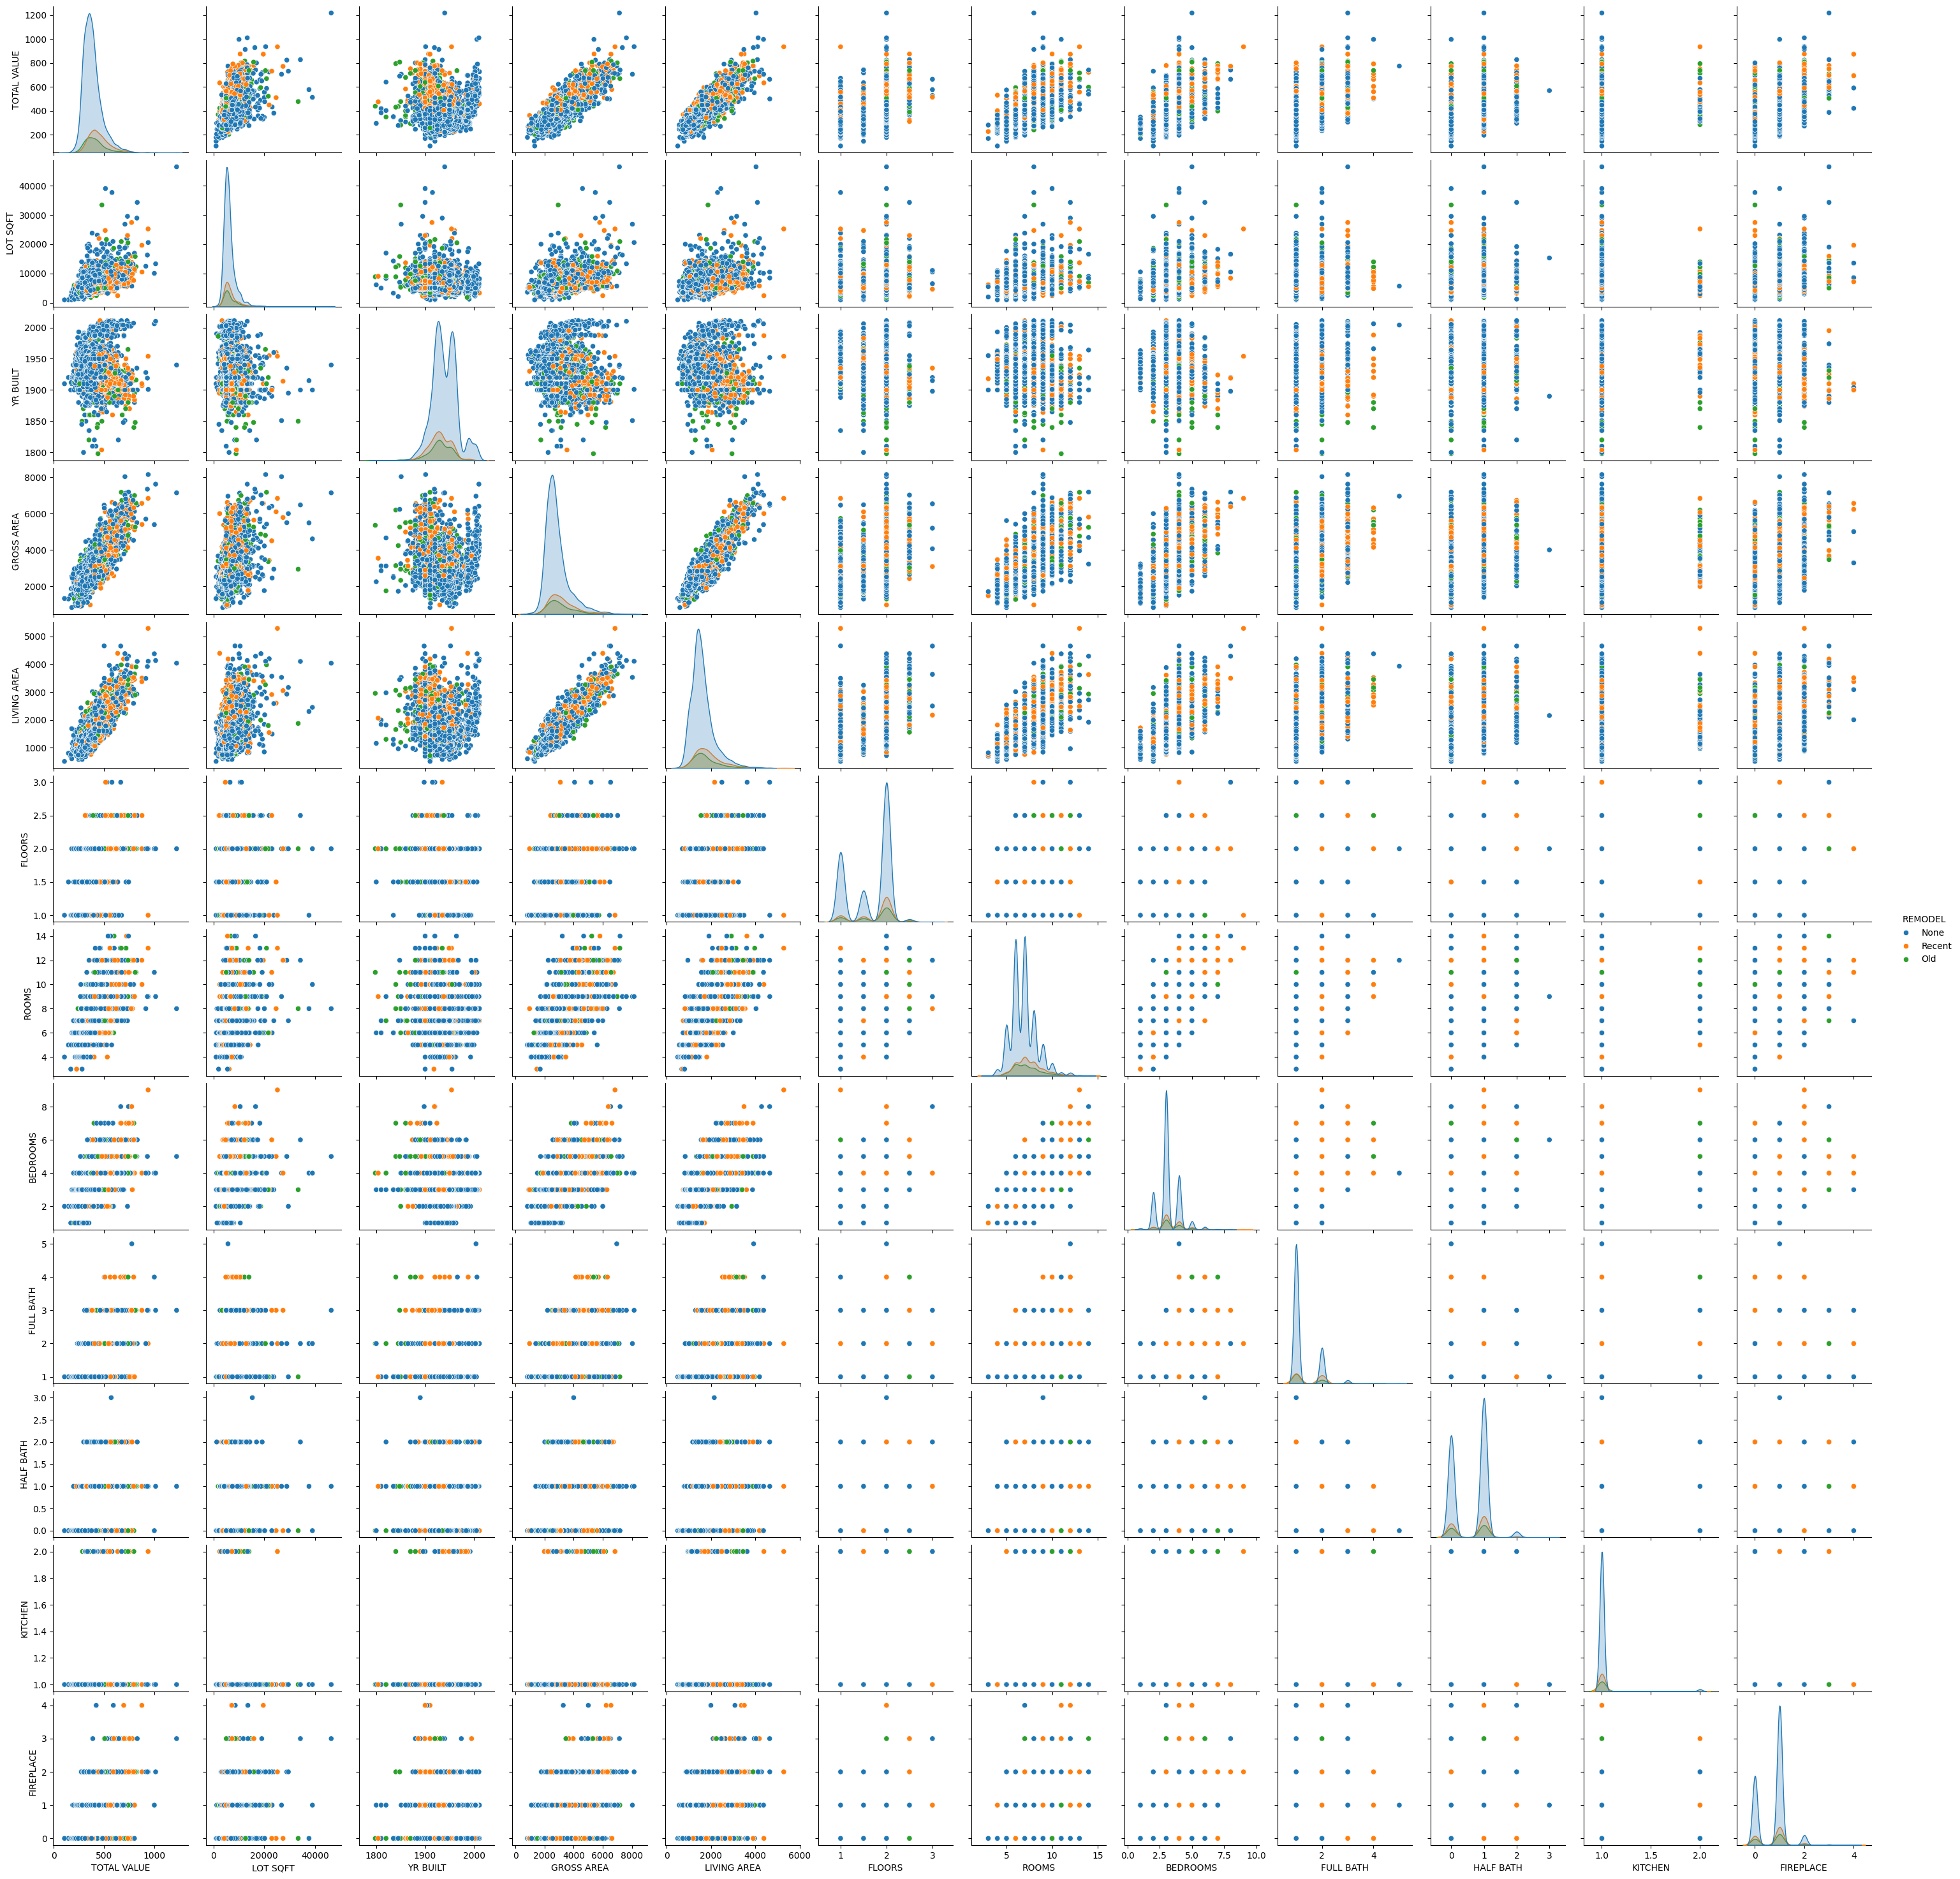

In [17]:
# Bivariate Analysis: Pairplot
# Add Gender as hue to pairplot to analyze across different genders
sns.pairplot(data=house_data, vars=house_num_col, hue="REMODEL", diag_kind="kde")

## 9) Further data preparation for modeling.

### 9.1) [5 points] Split the data into a training (70%) and a testing (30%) datasets.

* *Hint: To ensure the results are reproducible, use **`random_state=42`** when splitting.*

* *Note: After spliting, make sure to output the datasets' shape (rows) again.*

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset into training(70%) and testing(30%) sets
train, test = train_test_split(house_data, test_size=0.3, random_state=42)

# Check after splitting
print("Number of rows in train data =", train.shape[0])
print("Number of rows in test data =", test.shape[0])

Number of rows in train data = 4058
Number of rows in test data = 1740


### 9.2) [5 points] Before fitting a regression model, we need to convert categorical variables into numeric features. Please perform one-hot encoding on the 'REMODEL' column.

You may use either:   
	•	`pd.get_dummies()` applied separately to the training and testing sets,   
or   
	•	`sklearn.preprocessing.OneHotEncoder` with fit() only on the training set and transform() on both sets. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

Hint:  
	•	Make sure to finish train_test_split before encoding.  
    •	Make sure to fill missing values before encoding.  
	•	If you use `pd.get_dummies()`, make sure to **use `drop_first=True` to avoid multilinearity**.  
	•	If you use `pd.get_dummies()`, make sure to use `pandas.DataFrame.align()` to ensure the training and testing sets have the same one-hot columns.  
	•	If you use `sklearn.preprocessing.OneHotEncoder`, **do not fit your encoder on the entire dataset — only fit it on the training set to avoid data leakage**.

In [19]:
# One-hot encode the 'REMODEL' column
train = pd.get_dummies(train, columns=['REMODEL'], drop_first=True)
test = pd.get_dummies(test, columns=['REMODEL'], drop_first=True)

# Align the columns of training and testing dataframes
train, test = train.align(test, join='left', axis=1, fill_value=0)

## 10) Train a Linear Regression model to explain/predict the 'TOTAL VALUE' of houses using all the available features.

### 10.1) [1 points] Before training, we need to define final features (predictors) and target (label).

In [20]:
# Separate features and target variable, assuming 'TOTAL VALUE' is the target variable
train_features = train.drop(columns=['TOTAL VALUE'])
train_target = train['TOTAL VALUE']
test_features = test.drop(columns=['TOTAL VALUE'])
test_target = test['TOTAL VALUE']

### 10.2) [5 points] Train the Linear Regression model.

In [21]:
from sklearn.linear_model import LinearRegression

# Use training set to train a linear regression model
lm = LinearRegression() # define the model
lm.fit(train_features, train_target) # train the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 10.3) [4 points] Evaluate the performance of the model on both the training and the testing dataset using R-squared.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse,"MAE": mae,"R-squared": r2,"Adj. R-squared": adjr2,"MAPE": mape,},index=[0])

    return df_perf

In [23]:
print(f"Coefficients: {lm.coef_}")
print(f"\nIntercept: {lm.intercept_}")
print("\nTraining Performance")
sk_lin_reg_train_perf = model_performance_regression(lm, train_features, train_target)
print(sk_lin_reg_train_perf)
print("\nTesting Performance")
sk_lin_reg_test_perf = model_performance_regression(lm, test_features, test_target)
print(sk_lin_reg_test_perf)

Coefficients: [ 8.44517383e-03  1.58963992e-01  3.21034244e-02  5.24744474e-02
  4.14678565e+01  8.01207102e-01 -5.05543327e-01  1.71855598e+01
  1.78973204e+01 -1.38783571e+01  1.83598450e+01  6.24397039e+00
  2.37709467e+01]

Intercept: -259.64572811718614

Training Performance
        RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  42.380809  32.044642   0.819945        0.819366  8.336339

Testing Performance
        RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  43.882151  33.133505   0.795817        0.794279  8.727901


### 10.4) [4 points] Interprete the R-squared value for your model.

The model is able to explain about 80% of the variance observed in the dependent variable (TOTAL VALUE).

### 10.5) [6 points] Provide the interpretation of any three model coefficients.

* *Note: When presenting the coefficients, make sure to not only output their values but also provide an interpretation of their economic significance.*

In [24]:
# Display the column names and their coefficients
coef_df = pd.DataFrame(lm.coef_, index=train_features.columns, columns=["Coefficient"])
print(coef_df)

                Coefficient
LOT SQFT           0.008445
YR BUILT           0.158964
GROSS AREA         0.032103
LIVING AREA        0.052474
FLOORS            41.467857
ROOMS              0.801207
BEDROOMS          -0.505543
FULL BATH         17.185560
HALF BATH         17.897320
KITCHEN          -13.878357
FIREPLACE         18.359845
REMODEL_Old        6.243970
REMODEL_Recent    23.770947


LOT SQFT 0.0084 -> Keeping everything else constant, an increase in 1 sqft in lot size of a house is associated with an increase of 0.0084 units, i.e., $8.4, in the TOTAL VALUE of the house.

ROOMS 0.8012 -> Keeping everything else constant, an increase in one room in a house is associated with an increase of 0.8012 units (~$801.2) in the TOTAL VALUE of the house.

REMODEL_Recent  23.77 -> Keeping everything else constant, recently remodeled houses (REMODEL_Recent) have higher premium of ~23.77 units (i.e., about $23,770) compared to the houses that have not been remodeled (REMODEL_None).